In [1]:
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup 
import requests

In [2]:
website_url = requests.get('https://covid19ind.zaoapp.net/').text

In [3]:
soup = BeautifulSoup(website_url,'lxml')
print(soup.prettify())

<!DOCTYPE html>
<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->
<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!-->
<html lang="en-US" xmlns:addthis="https://www.addthis.com/help/api-spec" xmlns:fb="https://www.facebook.com/2008/fbml">
 <!--<![endif]-->
 <head>
  <link href="https://covid19ind.zaoapp.net/wp-content/cache/minify/8e4e0.default.include.868c87.css" media="all" rel="stylesheet"/>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="https://covid19ind.zaoapp.net/xmlrpc.php" rel="pingback"/>
  <title>
   [Covid19ind.org] - India Corona Tracker | LIVE Updates: Cases &amp; Deaths
  </title>
  <link href="https://covid19ind.zaoapp.net/wp-content/uploads/2020/04/favicon.ico" rel="icon" type="image/png"/>
  <!-- This site is optimized with the Yoast SEO plugin v13.3 - https://yoast.com/wordpress/plugins/seo/ -->
  <meta content="(COVID-19) Covid19Ind org is Coronavirus Tracker. 

In [4]:
Title = soup.title.text
Title

'[Covid19ind.org] - India Corona Tracker | LIVE Updates: Cases & Deaths'

In [5]:
data_tag = soup.find_all('td')
data_tag

[<td class="bg-gray-200 text-xs border hover:bg-primary hover:text-white px-2 py-2" data-v-b9d6f8b6=""><a href="https://covid19ind.zaoapp.net/maharashtra/">Maharashtra</a></td>,
 <td class="text-center border px-1 py-2" data-v-b9d6f8b6="">9915</td>,
 <td class="text-center border px-1 py-2" data-v-b9d6f8b6="">1557</td>,
 <td class="text-center border px-1 py-2" data-v-b9d6f8b6="">432</td>,
 <td class="bg-gray-200 text-xs border hover:bg-primary hover:text-white px-2 py-2" data-v-b9d6f8b6=""><a href="https://covid19ind.zaoapp.net/kerala/">Kerala</a></td>,
 <td class="text-center border px-1 py-2" data-v-b9d6f8b6="">496</td>,
 <td class="text-center border px-1 py-2" data-v-b9d6f8b6="">341</td>,
 <td class="text-center border px-1 py-2" data-v-b9d6f8b6="">2</td>,
 <td class="bg-gray-200 text-xs border hover:bg-primary hover:text-white px-2 py-2" data-v-b9d6f8b6=""><a href="https://covid19ind.zaoapp.net/tamil-nadu/">Tamil Nadu</a></td>,
 <td class="text-center border px-1 py-2" data-v-b9d

In [6]:
State_Name = []
Confirmed  = []
Recovered = []
Deaths = []

    

In [7]:
State_Name = []
for item in data_tag[0::4]:
    if len(item)==1:
        match = item.text

        State_Name.append(match)
    else:
        State_Name.append(np.nan)


In [8]:
len(State_Name)

44

In [9]:
Total_confirmed = []
for item in data_tag[1::4]:
    if len(item)==1:
        match = item.text

        Total_confirmed.append(match)
    else:
        Total_confirmed.append(np.nan)


In [10]:
len(Total_confirmed)

44

In [11]:
Recovered = []
for item in data_tag[2::4]:
    if len(item)==1:
        match = item.text

        Recovered.append(match)
    else:
        Recovered.append(np.nan)


In [12]:
len(Recovered)

44

In [13]:
Deaths = []
for item in data_tag[3::4]:
    if len(item)==1:
        match = item.text

        Deaths.append(match)
    else:
        Deaths.append(np.nan)


In [14]:
len(Deaths)

44

In [15]:
Covid_ind = pd.DataFrame()
Covid_ind['State_Name'] = State_Name
Covid_ind['Total_confirmed'] = Total_confirmed
Covid_ind['Total_Recovered'] = Recovered
Covid_ind['Total_Deaths'] = Deaths

In [16]:
Covid_ind

,State_Name,Total_confirmed,Total_Recovered,Total_Deaths
0,Maharashtra,9915,1557,432
1,Kerala,496,341,2
2,Tamil Nadu,2196,1266,24
3,Uttar Pradesh,2174,327,27
4,Delhi,3439,1092,47
5,Andhra Pradesh,1332,145,22
6,Karnataka,534,152,16
7,Telangana,1016,194,21
8,Gujarat,4078,565,190
9,Rajasthan,2534,493,11


In [17]:
Covid_ind = Covid_ind.iloc[0:29,:]

In [18]:
Covid_ind['State_Name'] = Covid_ind['State_Name'].str.replace('\W', '')


C:\Users\kiran kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
Covid_ind.sort_values(by = 'Total_confirmed',ascending=True,inplace = True)
Covid_ind

C:\Users\kiran kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,State_Name,Total_confirmed,Total_Recovered,Total_Deaths
27,Mizoram,1,0,0
7,Telangana,1016,194,21
24,AndamanandNicobarIslands,11,10,0
17,Bihar,126,42,2
5,AndhraPradesh,1332,145,22
14,Ladakh,18,14,0
12,MadhyaPradesh,1846,257,80
26,Manipur,2,1,0
3,UttarPradesh,2174,327,27
2,TamilNadu,2196,1266,24


In [20]:
Covid_ind['Total_confirmed'] =Covid_ind['Total_confirmed'].apply(lambda x: x.replace(',',''))


C:\Users\kiran kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
Covid_ind

,State_Name,Total_confirmed,Total_Recovered,Total_Deaths
27,Mizoram,1,0,0
7,Telangana,1016,194,21
24,AndamanandNicobarIslands,11,10,0
17,Bihar,126,42,2
5,AndhraPradesh,1332,145,22
14,Ladakh,18,14,0
12,MadhyaPradesh,1846,257,80
26,Manipur,2,1,0
3,UttarPradesh,2174,327,27
2,TamilNadu,2196,1266,24


In [22]:
Covid_ind['Total_confirmed'] = Covid_ind.Total_confirmed.astype('int64')
Covid_ind['Total_Recovered'] = Covid_ind.Total_Recovered.astype('int64')
Covid_ind['Total_Deaths'] = Covid_ind.Total_Deaths.astype('int64')

C:\Users\kiran kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\kiran kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kiran kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

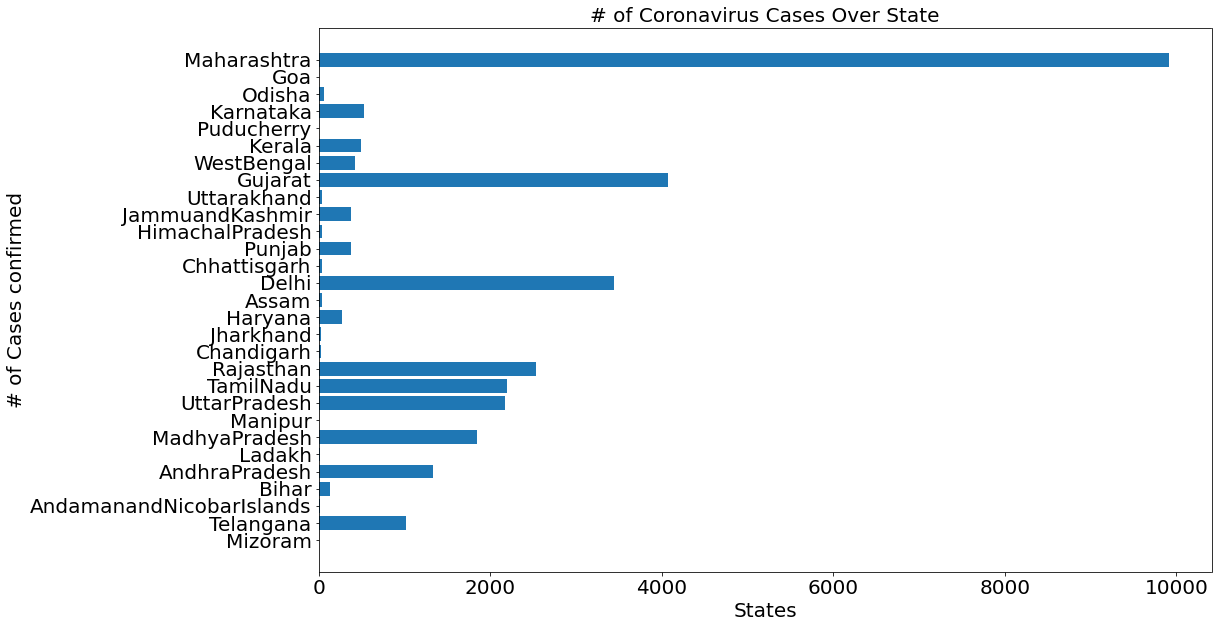

In [24]:

plt.figure(figsize=(16, 10))
plt.barh(Covid_ind['State_Name'],Covid_ind['Total_confirmed'])
plt.title('# of Coronavirus Cases Over State', size=20)
plt.xlabel('States', size=20)
plt.ylabel('# of Cases confirmed', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

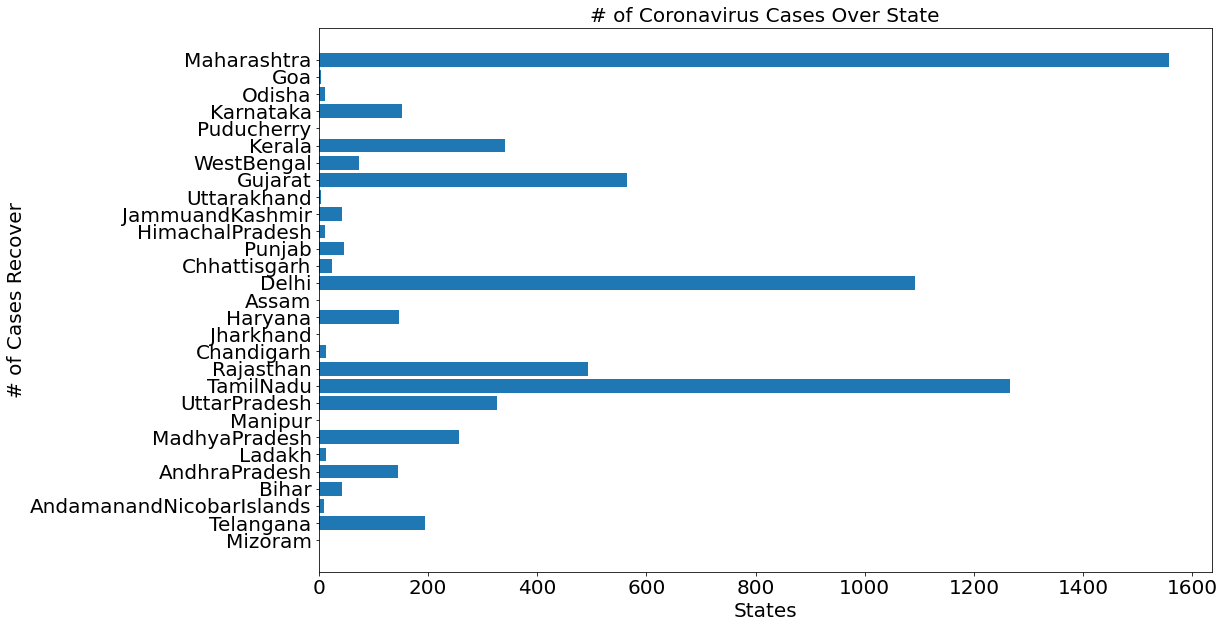

In [25]:

plt.figure(figsize=(16, 10))
plt.barh(Covid_ind['State_Name'],Covid_ind['Total_Recovered'])
plt.title('# of Coronavirus Cases Over State', size=20)
plt.xlabel('States', size=20)
plt.ylabel('# of Cases Recover', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

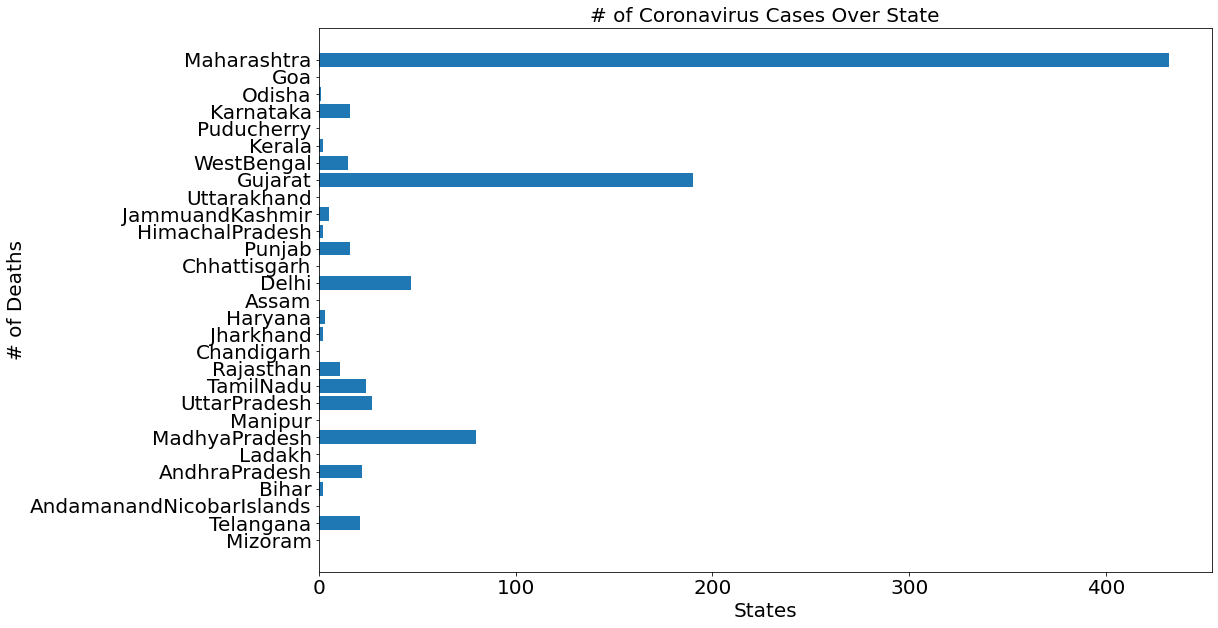

In [26]:

plt.figure(figsize=(16, 10))
plt.barh(Covid_ind['State_Name'],Covid_ind['Total_Deaths'])
plt.title('# of Coronavirus Cases Over State', size=20)
plt.xlabel('States', size=20)
plt.ylabel('# of Deaths', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

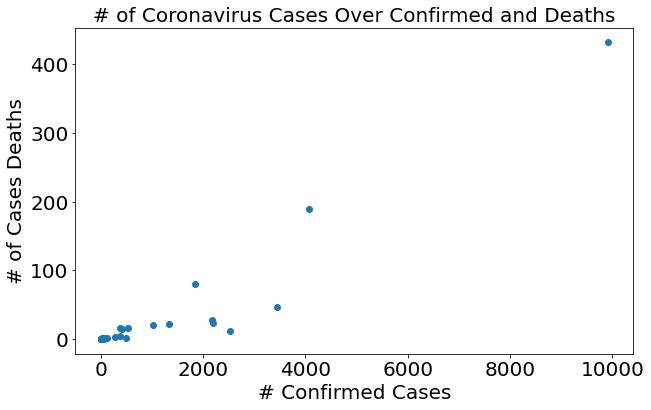

In [27]:

plt.figure(figsize=(10, 6))
plt.scatter(Covid_ind['Total_confirmed'],Covid_ind['Total_Deaths'])
plt.title('# of Coronavirus Cases Over Confirmed and Deaths', size=20)
plt.xlabel('# Confirmed Cases', size=20)
plt.ylabel('# of Cases Deaths', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [28]:
#Covid_ind.to_csv('Covid_ind_01_05.csv')

In [29]:
#Covid_ind.to_csv('Covid_ind_02_05.csv')

In [30]:
#Covid_ind.to_csv('Covid_ind_03_05.csv')

In [31]:
#Covid_ind.to_csv('Covid_ind_04_05.csv')

In [32]:
#Covid_ind.to_csv('Covid_ind_05_05.csv')

In [33]:
#Covid_ind.to_csv('Covid_ind_06_05.csv')

In [34]:
#Covid_ind.to_csv('Covid_ind_07_04.csv')

In [35]:
#Covid_ind.to_csv('Covid_ind_08_04.csv')
#Covid_ind.to_csv('Covid_ind_09_05.csv')
#Covid_ind.to_csv('Covid_ind_10_05.csv')
#Covid_ind.to_csv('Covid_ind_11_04.csv')
#Covid_ind.to_csv('Covid_ind_12_05.csv')
#Covid_ind.to_csv('Covid_ind_13_05.csv')
#Covid_ind.to_csv('Covid_ind_14_05.csv')
#Covid_ind.to_csv('Covid_ind_15_05.csv')
#Covid_ind.to_csv('Covid_ind_16_04.csv')
Covid_ind.to_csv('Covid_ind_17_05.csv')
#Covid_ind.to_csv('Covid_ind_18_04.csv')
#Covid_ind.to_csv('Covid_ind_19_04.csv')
#Covid_ind.to_csv('Covid_ind_20_04.csv')
#Covid_ind.to_csv('Covid_ind_21_04.csv')
#Covid_ind.to_csv('Covid_ind_22_04.csv')
#Covid_ind.to_csv('Covid_ind_23_04.csv')
#Covid_ind.to_csv('Covid_ind_24_04.csv')
#Covid_ind.to_csv('Covid_ind_25_04.csv')
#Covid_ind.to_csv('Covid_ind_26_04.csv')
#Covid_ind.to_csv('Covid_ind_27_04.csv')
#Covid_ind.to_csv('Covid_ind_28_04.csv')
#Covid_ind.to_csv('Covid_ind_29_04.csv')
#Covid_ind.to_csv('Covid_ind_30_04.csv')